<a href="https://colab.research.google.com/github/aelee-im/New-idea-for-ARIMA-modeling-with-hourly-duration-dataset/blob/main/3_Python_Script_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/electric

/content/gdrive/My Drive/electric


In [ ]:
ls -ltr

total 2631
-rw------- 1 root root 1201998 Nov 25 11:29 tallahassee.csv
-rw------- 1 root root 1491805 Nov 26 09:28 outlier_svm.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [ ]:
## remove outlier
datapath = '/content/gdrive/My Drive/electric/outlier_svm.csv'

data = pd.read_csv(datapath, header = 0)
print(data.head())

   Unnamed: 0                 time  y_true  y_pred  anomaly3
0           0  2015-07-01 01:00:00   225.0   274.0         1
1           1  2015-07-01 02:00:00   222.0   255.0         1
2           2  2015-07-01 03:00:00   213.0   243.0         1
3           3  2015-07-01 04:00:00   206.0   237.0         1
4           4  2015-07-01 05:00:00   207.0   238.0         1


In [ ]:
## remove outlier
data.loc[data['anomaly3'] == -1, ['y_true']] = data['y_true'].mean()
data['y_true'].describe()

count    37565.000000
mean       322.260634
std         82.543543
min        185.000000
25%        264.000000
50%        305.000000
75%        373.000000
max        558.000000
Name: y_true, dtype: float64

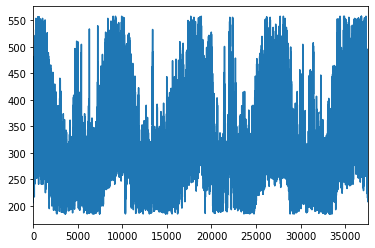

In [ ]:
## remove outlier
data['y_true'].plot()

In [ ]:
datapath = '/content/gdrive/My Drive/electric/tallahassee.csv'

col = ["time", "y_true", "y_pred"]
data = pd.read_csv(datapath, header = None, names = col, skiprows = 1)
print(data.head())

                  time  y_true  y_pred
0  2015-07-01 01:00:00   225.0   274.0
1  2015-07-01 02:00:00   222.0   255.0
2  2015-07-01 03:00:00   213.0   243.0
3  2015-07-01 04:00:00   206.0   237.0
4  2015-07-01 05:00:00   207.0   238.0


In [ ]:
# identify missing value : how many missing values each column has
print(data.isna().sum())

Unnamed: 0    0
time          0
y_true        0
y_pred        9
anomaly3      0
dtype: int64


In [ ]:
# imputate missing value with forward(previous) value
data['y_true'] = data['y_true'].fillna(method='ffill')

In [ ]:
# checking for missing values, again.
print(data.isna().sum())

time      0
y_true    0
y_pred    9
dtype: int64


In [ ]:
# define date & time
data.time = pd.to_datetime(data.time, format='%Y-%m-%d %H:%M:%S')
data.head()

,Unnamed: 0,time,y_true,y_pred,anomaly3
0,0,2015-07-01 01:00:00,225.0,274.0,1
1,1,2015-07-01 02:00:00,222.0,255.0,1
2,2,2015-07-01 03:00:00,213.0,243.0,1
3,3,2015-07-01 04:00:00,206.0,237.0,1
4,4,2015-07-01 05:00:00,207.0,238.0,1


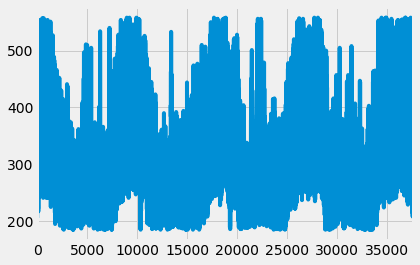

In [ ]:
data_true = data['y_true']
data_true.plot()

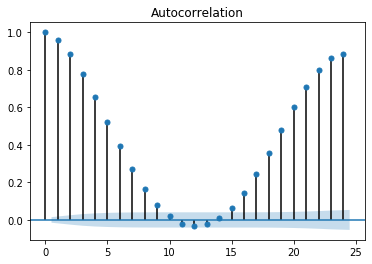

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(train.y_true, lags=24)

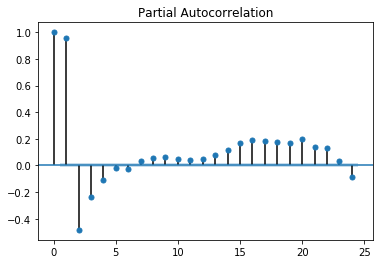

In [ ]:
fig_01 = plot_pacf(train.y_true,lags=24)

In [ ]:
# Augmented Dickey Fuller test(ADF test) to check out the stationality of dataset
# if p-value < 0.05 : dataset is indeed stationary and no differencing is required(i.e. d=0)
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(train.y_true)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

NameError: ignored

(0, 48)

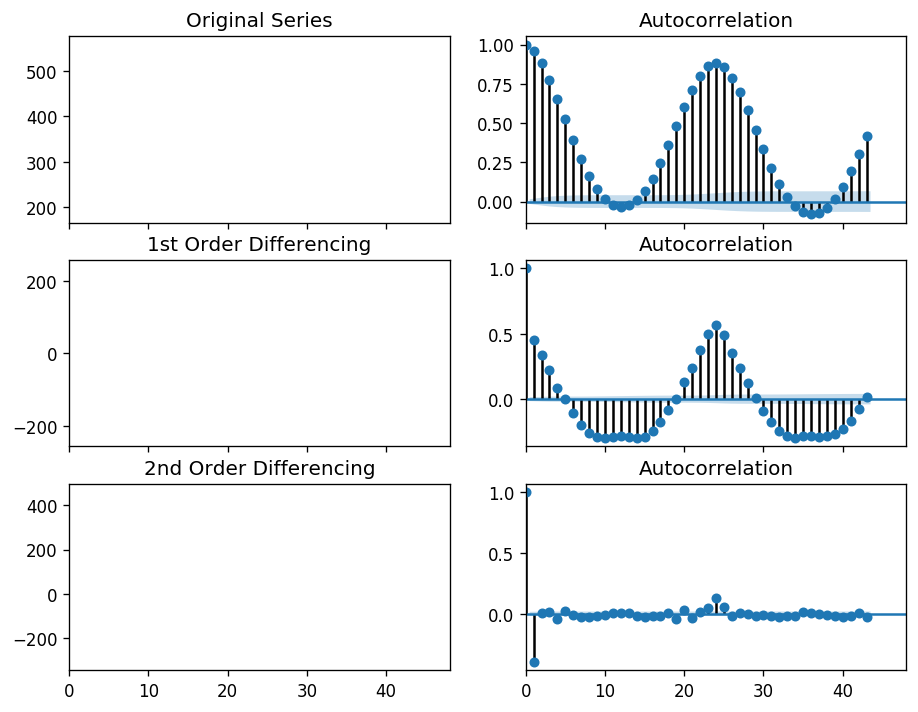

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train.y_true); axes[0, 0].set_title('Original Series')
plt.xlim(13000,20000)
fig = plot_acf(train.y_true, ax=axes[0, 1])
plt.xlim(0,48)


# 1st Differencing
axes[1, 0].plot(train.y_true.diff()); axes[1, 0].set_title('1st Order Differencing')
plt.xlim(13000,20000)
fig1 = plot_acf(train.y_true.diff().dropna(), ax=axes[1, 1])
plt.xlim(0,48)

# 2nd Differencing
axes[2, 0].plot(train.y_true.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plt.xlim(13000,20000)
fig2 = plot_acf(train.y_true.diff().diff().dropna(), ax=axes[2, 1])
plt.xlim(0,48)

#plt.xlim(0,24)
#plt.show()

# d= 1 ?

(-0.5, 0.5)

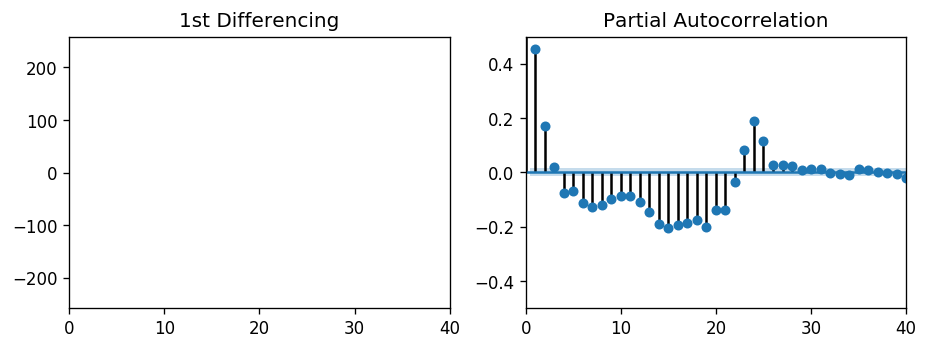

In [ ]:
# Define the AR term via ACF plot -> p=1 or 2?
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train.y_true.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-1,2))
plot_pacf(train.y_true.diff().dropna(), ax=axes[1], lags = 40)
plt.xlim(0,40)
plt.ylim(-0.5,0.5)

#plt.show()

(-0.5, 0.6)

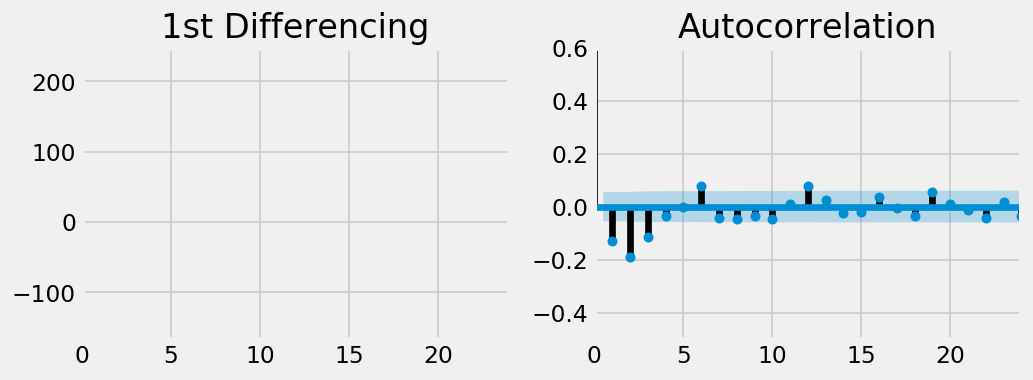

In [ ]:
# define MA term via ACF plot -> q= 2 or 3???
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train.y_true.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
fig_new = plot_acf(train.y_true.diff().dropna(), ax=axes[1])
plt.xlim(0,24)
plt.ylim(-0.5, 0.6)
#plt.show()

In [ ]:
!pip install pyramid

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 174kB 46.7MB/s 
     |████████████████████████████████| 122kB 53.7MB/s 


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.1MB 2.8MB/s 


In [ ]:
# find out the best model
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(train.y_true, start_p=0, start_q=0,
                           max_p=2, max_q=4, m=24,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

NameError: ignored

In [ ]:
data['year'] = pd.DatetimeIndex(data['time']).year
data['month'] = pd.DatetimeIndex(data['time']).month
data['hour'] = pd.DatetimeIndex(data['time']).hour
print(data.head())

   Unnamed: 0                time  y_true  y_pred  anomaly3  year  month  hour
0           0 2015-07-01 01:00:00   225.0   274.0         1  2015      7     1
1           1 2015-07-01 02:00:00   222.0   255.0         1  2015      7     2
2           2 2015-07-01 03:00:00   213.0   243.0         1  2015      7     3
3           3 2015-07-01 04:00:00   206.0   237.0         1  2015      7     4
4           4 2015-07-01 05:00:00   207.0   238.0         1  2015      7     5


In [ ]:
data_10 = data.loc[data['hour'] == 10]
data_n = data_10
data_n.head()

,Unnamed: 0,time,y_true,y_pred,anomaly3,year,month,hour
9,9,2015-07-01 10:00:00,323.0,347.0,1,2015,7,10
33,33,2015-07-02 10:00:00,358.0,357.0,1,2015,7,10
57,57,2015-07-03 10:00:00,314.0,302.0,1,2015,7,10
81,81,2015-07-04 10:00:00,306.0,306.0,1,2015,7,10
105,105,2015-07-05 10:00:00,289.0,287.0,1,2015,7,10


In [ ]:
train, test = data_n[data_n['year']<=2018], data_n[data_n['year']==2019]
print("train length: %d" % (len(train)), train.head(),sep='\n')
print("test length: %d" % (len(test)), test.head(),sep='\n')

train length: 1280
     Unnamed: 0                time  y_true  ...  year  month  hour
9             9 2015-07-01 10:00:00   323.0  ...  2015      7    10
33           33 2015-07-02 10:00:00   358.0  ...  2015      7    10
57           57 2015-07-03 10:00:00   314.0  ...  2015      7    10
81           81 2015-07-04 10:00:00   306.0  ...  2015      7    10
105         105 2015-07-05 10:00:00   289.0  ...  2015      7    10

[5 rows x 8 columns]
test length: 285
       Unnamed: 0                time  y_true  ...  year  month  hour
30729       30729 2019-01-01 10:00:00   234.0  ...  2019      1    10
30753       30753 2019-01-02 10:00:00   259.0  ...  2019      1    10
30777       30777 2019-01-03 10:00:00   260.0  ...  2019      1    10
30801       30801 2019-01-04 10:00:00   271.0  ...  2019      1    10
30825       30825 2019-01-05 10:00:00   285.0  ...  2019      1    10

[5 rows x 8 columns]


In [ ]:
train, test = data[(data['year']>=2017) & (data['year']<=2018)], data[data['year']==2019]
print("train length: %d" % (len(train)), train.head(),sep='\n')
print("test length: %d" % (len(test)), test.head(),sep='\n')

train length: 17520
       Unnamed: 0                time  y_true  ...  year  month  hour
13199       13199 2017-01-01 00:00:00   248.0  ...  2017      1     0
13200       13200 2017-01-01 01:00:00   235.0  ...  2017      1     1
13201       13201 2017-01-01 02:00:00   226.0  ...  2017      1     2
13202       13202 2017-01-01 03:00:00   217.0  ...  2017      1     3
13203       13203 2017-01-01 04:00:00   211.0  ...  2017      1     4

[5 rows x 8 columns]
test length: 6846
       Unnamed: 0                time  y_true  ...  year  month  hour
30719       30719 2019-01-01 00:00:00   232.0  ...  2019      1     0
30720       30720 2019-01-01 01:00:00   220.0  ...  2019      1     1
30721       30721 2019-01-01 02:00:00   212.0  ...  2019      1     2
30722       30722 2019-01-01 03:00:00   204.0  ...  2019      1     3
30723       30723 2019-01-01 04:00:00   198.0  ...  2019      1     4

[5 rows x 8 columns]


In [ ]:
test.tail()

,Unnamed: 0,time,y_true,y_pred,anomaly3,year,month,hour
37449,37449,2019-10-08 10:00:00,359.0,325.0,1,2019,10,10
37473,37473,2019-10-09 10:00:00,342.0,322.0,1,2019,10,10
37497,37497,2019-10-10 10:00:00,312.0,299.0,1,2019,10,10
37521,37521,2019-10-11 10:00:00,311.0,285.0,1,2019,10,10
37545,37545,2019-10-12 10:00:00,263.0,259.0,1,2019,10,10


In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from sklearn.metrics import r2_score

In [ ]:
# 1,1,1 ARIMA Model
model = ARIMA(train.y_true, order=(3,0,0))
fitted = model.fit(disp=-1)
print(fitted.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 y_true   No. Observations:                 1280
Model:                     ARMA(3, 0)   Log Likelihood               -6417.701
Method:                       css-mle   S.D. of innovations             36.401
Date:                Sun, 01 Dec 2019   AIC                          12845.402
Time:                        15:48:27   BIC                          12871.176
Sample:                             0   HQIC                         12855.080
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          303.2911      3.049     99.481      0.000     297.316     309.266
ar.L1.y_true     0.8482      0.028     30.561      0.000       0.794       0.903
ar.L2.y_true    -0.2996      0.036     -8.42

In [ ]:
# Forecast
fc, se, conf = fitted.forecast(285, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

(0, 400)

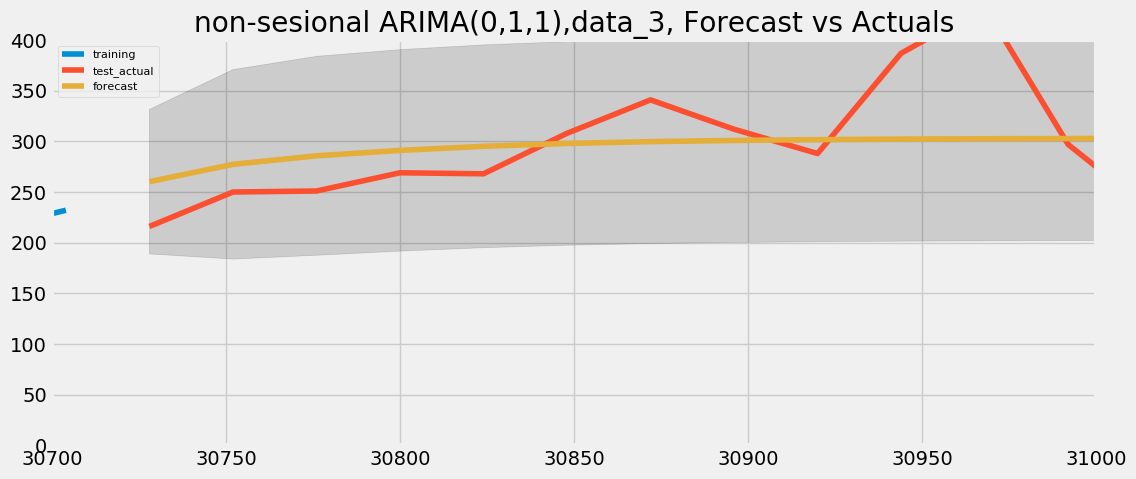

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.y_true, label='training')
plt.plot(test.y_true, label='test_actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('non-sesional ARIMA(0,1,1),data_3, Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xlim(30700, 31000) 
plt.ylim(0, 400) 
#plt.show()

In [ ]:
import numpy as np
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    r_sqr = r2_score(actual, forecast) 
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax, 'R-sqr':r_sqr})

forecast_accuracy(fc_series.values[:8], test.y_true.values[:8])
#[:8]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'R-sqr': 0.3890449348351329,
 'acf1': 0.5506226293901377,
 'corr': 0.8765989214084333,
 'mae': 27.23503556479009,
 'mape': 0.10311290837623954,
 'me': 11.652300674622019,
 'minmax': 0.09336902127232505,
 'mpe': 0.05587332540666397,
 'rmse': 29.70329842472584}

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(train.y_true, start_p=0, start_q=0,
                      test="adf",       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=365,              # m=4(quarterly data), m=12(monthly data), m=1(yearly data, seasonmal = False, m=52(weekly data))
                      d=None,           # let model determine 'd'
                      seasonal=False,   # (No) Seasonality
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

#test=c("kpss", "adf", "pp")
#seasonal_test=c("seas", "ocsb", "hegy", "ch")
#seasonal_test="ocsb",
                      #start_P=0,
                      #start_Q=0,
                      #max_P=4,
                      #max_Q=4, 
                      #seasonal_test="ocsb",
                      #D=None, 

Fit ARIMA: order=(0, 0, 0); AIC=13405.854, BIC=13416.163, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=12336.072, BIC=12351.536, Fit time=0.062 seconds
Fit ARIMA: order=(0, 0, 1); AIC=12662.135, BIC=12677.599, Fit time=0.061 seconds
Fit ARIMA: order=(2, 0, 0); AIC=12325.938, BIC=12346.556, Fit time=0.111 seconds
Fit ARIMA: order=(2, 0, 1); AIC=12322.447, BIC=12348.220, Fit time=0.278 seconds
Fit ARIMA: order=(3, 0, 2); AIC=12280.285, BIC=12316.368, Fit time=0.803 seconds
Fit ARIMA: order=(2, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 0, 2); AIC=12282.287, BIC=12323.524, Fit time=0.970 seconds
Fit ARIMA: order=(3, 0, 1); AIC=12278.287, BIC=12309.215, Fit time=0.564 seconds
Fit ARIMA: order=(4, 0, 1); AIC=12280.285, BIC=12316.368, Fit time=0.701 seconds
Fit ARIMA: order=(3, 0, 0); AIC=12313.981, BIC=12339.754, Fit time=0.125 seconds
Total fit time: 3.796 seconds
                              ARMA Model Results                              
Dep. Variable:

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(train.y_true, start_p=0, start_q=0,
                      test="adf",       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=7,              # m=4(quarterly data), m=12(monthly data), m=1(yearly data, seasonmal = False, m=52(weekly data))
                      d=None,           # let model determine 'd'
                      seasonal=True,   # (No) Seasonality
                      start_P=0,
                      start_Q=0,
                      max_P=5,
                      max_Q=5, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

#test=c("kpss", "adf", "pp")
#seasonal_test=c("seas", "ocsb", "hegy", "ch")
#seasonal_test="ch",

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 7); AIC=13507.708, BIC=13518.006, Fit time=0.073 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 7); AIC=12503.189, BIC=12523.786, Fit time=1.847 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 7); AIC=12497.383, BIC=12517.979, Fit time=1.946 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 1, 7); AIC=12513.220, BIC=12538.966, Fit time=5.506 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 0, 7); AIC=12992.665, BIC=13008.113, Fit time=0.364 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 2, 7); AIC=12499.305, BIC=12525.050, Fit time=5.449 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 2, 7); AIC=12496.981, BIC=12527.876, Fit time=13.992 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 7); AIC=12126.843, BIC=12162.887, Fit time=17.492 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 2, 7); AIC=12124.914, BIC=12155.809, Fit time=10.936 seconds
Fit ARIMA: order

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(train.y_true, start_p=0, start_q=0,
                      test="adf",       # use adftest to find optimal 'd'
                      max_p=2, max_q=2, # maximum p and q
                      m=12,              # m=4(quarterly data), m=12(monthly data), m=1(yearly data, seasonmal = False, m=52(weekly data))
                      d=None,           # let model determine 'd'
                      seasonal=True,   # (No) Seasonality
                      start_P=0,
                      start_Q=0,
                      max_P=4,
                      max_Q=4, 
                      seasonal_test="ocsb", 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

#test=c("kpss", "adf", "pp")
#seasonal_test=c("seas", "ocsb", "hegy", "ch")

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=14291.736, BIC=14302.046, Fit time=0.047 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=12542.282, BIC=12562.901, Fit time=3.556 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=13081.752, BIC=13102.371, Fit time=1.824 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=12540.458, BIC=12555.922, Fit time=0.131 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 12); AIC=12542.226, BIC=12562.845, Fit time=1.428 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 12); AIC=12544.165, BIC=12569.938, Fit time=4.866 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=12542.440, BIC=12563.058, Fit time=0.157 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 12); AIC=12542.432, BIC=12563.051, Fit time=0.101 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 12); AIC=12492.301, BIC=12518.074, Fit time=0.971 seconds
Fit ARIMA:

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(train.y_true, start_p=0, start_q=0,
                      test="kpss",       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=52,              # m=4(quarterly data), m=12(monthly data), m=1(yearly data, seasonmal = False, m=52(weekly data))
                      d=None,           # let model determine 'd'
                      seasonal=True,   # (No) Seasonality
                      start_P=0,
                      start_Q=0,
                      max_P=2,
                      max_Q=2, 
                      seasonal_test="ch", 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

#test=c("kpss", "adf", "pp")
#seasonal_test=c("seas", "ocsb", "hegy", "ch")

ModuleNotFoundError: ignored

In [ ]:
# prepare appropriate dataframe
df_train = train.drop(['y_pred', 'year', 'month'], axis=1)
print(df_train.head())

                 time  y_true
0 2015-07-01 01:00:00   225.0
1 2015-07-01 02:00:00   222.0
2 2015-07-01 03:00:00   213.0
3 2015-07-01 04:00:00   206.0
4 2015-07-01 05:00:00   207.0


In [ ]:
df_train.tail()

,time,y_true
28506,2018-09-30 19:00:00,459.0
28507,2018-09-30 20:00:00,434.0
28508,2018-09-30 21:00:00,401.0
28509,2018-09-30 22:00:00,381.0
28510,2018-09-30 23:00:00,351.0


In [ ]:
df_test = test.drop(['y_pred', 'year', 'month'], axis=1)
df_test.head()

,time,y_true
28511,2018-10-01 00:00:00,322.0
28512,2018-10-01 01:00:00,294.0
28513,2018-10-01 02:00:00,272.0
28514,2018-10-01 03:00:00,258.0
28515,2018-10-01 04:00:00,251.0


In [ ]:
df_test.tail()

,time,y_true
37560,2019-10-13 01:00:00,270.0
37561,2019-10-13 02:00:00,250.0
37562,2019-10-13 03:00:00,236.0
37563,2019-10-13 04:00:00,226.0
37564,2019-10-13 05:00:00,219.0


In [ ]:
# fit the model with train
model_fit = model.fit(df_train.y_true)
print(model_fit.summary())

ValueError: ignored

In [ ]:
# 2,1,5 ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train.y_true, order=(2,1,5))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.y_true   No. Observations:                28510
Model:                 ARIMA(2, 1, 5)   Log Likelihood             -111140.404
Method:                       css-mle   S.D. of innovations             11.933
Date:                Mon, 25 Nov 2019   AIC                         222298.808
Time:                        18:57:38   BIC                         222373.130
Sample:                             1   HQIC                        222322.713
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0027      0.053      0.051      0.960      -0.101       0.107
ar.L1.D.y_true     1.9189      0.001   1698.339      0.000       1.917       1.921
ar.L2.D.y_true    -0.9860      0.001

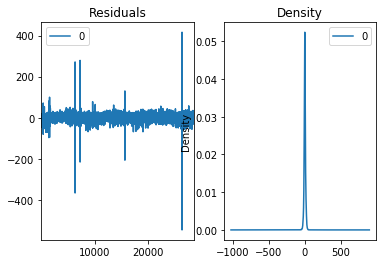

In [ ]:
# Plot residual errors
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
#plt.show()

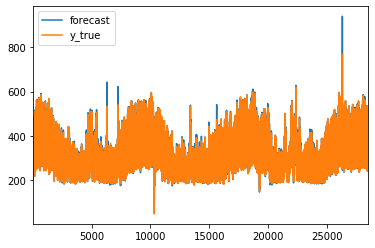

In [ ]:
# Actual vs Fitted
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
model_fit.plot_predict(dynamic=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 500)

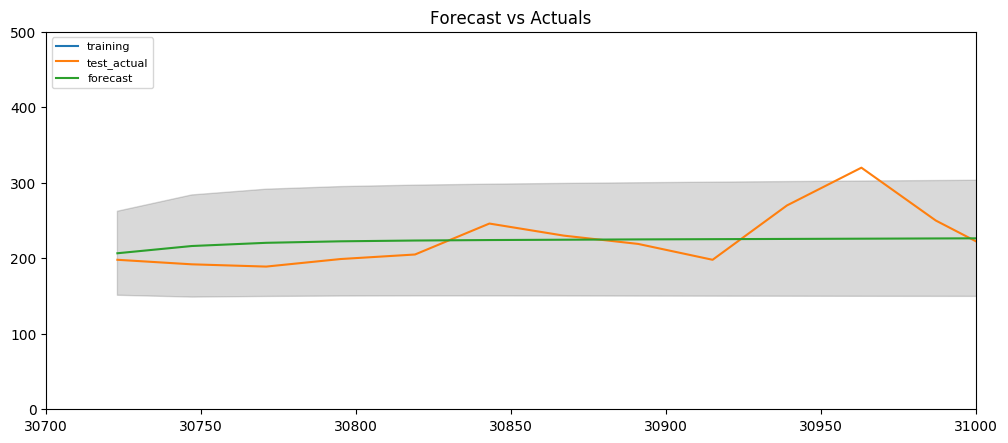

In [ ]:
# fit to train dataset
model = ARIMA(train.y_true, order=(2, 0, 2))  
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(286, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.y_true, label='training')
plt.plot(test.y_true, label='test_actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xlim(30700, 31000) 
plt.ylim(0, 500) 
#plt.show()

(100, 600)

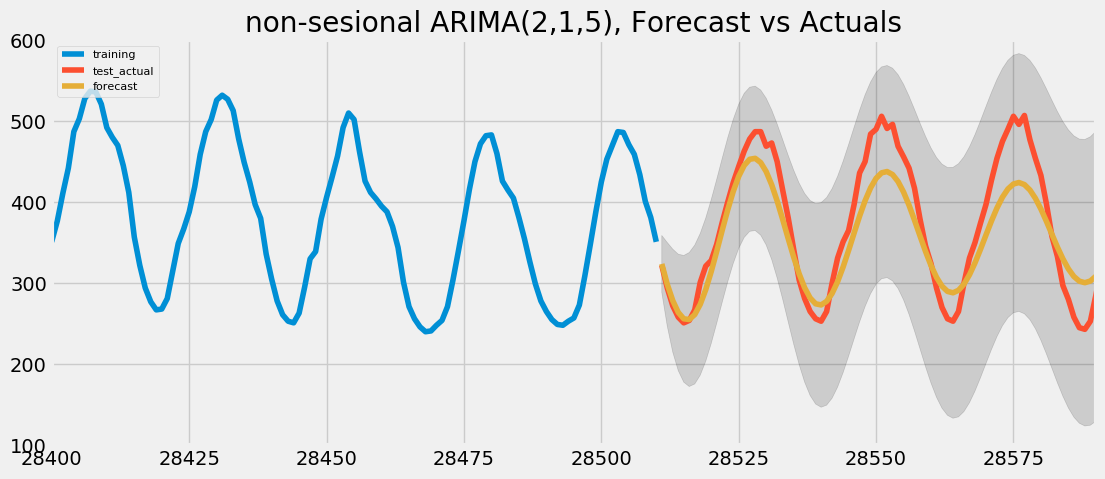

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.y_true, label='training')
plt.plot(test.y_true, label='test_actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('non-sesional ARIMA(2,1,5), Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xlim(28400, 28590) 
plt.ylim(100,600)
#plt.show()

In [ ]:
import numpy as np
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

ValueError: ignored

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(12,5), dpi=100)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
#plt.show()

NameError: ignored

In [ ]:
# drew residual plots
model.plot_diagnostics(figsize=(7,5))
plt.show()

AttributeError: ignored

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# Build Model
model = ARIMA(train.y_true, order=(2, 1, 2), seasonal_order=(2, 1, 2, 12))  
fitted = model.fit(disp=1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(9054, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.y_true, label='training')
plt.plot(test.y_true, label='test_actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
#plt.show()

TypeError: ignored

In [ ]:
!pip install statsmodels

In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = range(0, 2)
q = range(2, 3)

# Generate all different combinations of p, q and q triplets
pdq = [(0,0,0), (0,0,1), (0,1,0), (0,1,1), (0,0,2), (0,1,2),
       (1,0,0), (1,0,1), (1,1,0), (1,1,1), (1,1,2), (1,1,2), 
       (2,0,0), (2,0,1), (2,1,0), (2,1,1), (2,1,2), (2,1,2)]

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(0,1,0,24), (1,1,0,24), (1,1,1,24), (0,1,1,24), (0,1,2,24), (1,1,2,24),
                (2,1,0,24), (2,1,1,24), (2,1,2,24)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (1, 1, 0, 24)
SARIMAX: (0, 0, 1) x (1, 1, 1, 24)


In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 2, 7)
SARIMAX: (0, 0, 2) x (0, 1, 0, 7)
SARIMAX: (0, 0, 2) x (0, 1, 1, 7)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

data_9_7 = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train.y_true,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

            results = mod.fit()

            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
            data_9_7.append((param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:18301.456164256204
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:16884.93480243541
ARIMA(0, 0, 0)x(0, 0, 2, 7)7 - AIC:16098.943970074546
ARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:13793.78502156106
ARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:13337.62767725032
ARIMA(0, 0, 0)x(0, 1, 2, 7)7 - AIC:13337.620446756991
ARIMA(0, 0, 0)x(0, 2, 0, 7)7 - AIC:15059.306368321271
ARIMA(0, 0, 0)x(0, 2, 1, 7)7 - AIC:13763.49604101614
ARIMA(0, 0, 0)x(0, 2, 2, 7)7 - AIC:13325.361130157899
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:13884.473193654303
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:13438.969337933431
ARIMA(0, 0, 0)x(1, 0, 2, 7)7 - AIC:13439.122680185415
ARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:13515.240666234273
ARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:13296.862549103935
ARIMA(0, 0, 0)x(1, 1, 2, 7)7 - AIC:13329.546685980904
ARIMA(0, 0, 0)x(1, 2, 0, 7)7 - AIC:14410.96847962285
ARIMA(0, 0, 0)x(1, 2, 1, 7)7 - AIC:13491.511092469158
ARIMA(0, 0, 0)x(1, 2, 2, 7)7 - AIC:13314.155702668751
ARIMA(0, 0, 0)x(2, 0, 0, 7)7 - AI

In [ ]:
data_9_7[:10]

[((0, 0, 0), (0, 0, 0, 7), 18301.456164256204),
 ((0, 0, 0), (0, 0, 1, 7), 16884.93480243541),
 ((0, 0, 0), (0, 0, 2, 7), 16098.943970074546),
 ((0, 0, 0), (0, 1, 0, 7), 13793.78502156106),
 ((0, 0, 0), (0, 1, 1, 7), 13337.62767725032),
 ((0, 0, 0), (0, 1, 2, 7), 13337.620446756991),
 ((0, 0, 0), (0, 2, 0, 7), 15059.306368321271),
 ((0, 0, 0), (0, 2, 1, 7), 13763.49604101614),
 ((0, 0, 0), (0, 2, 2, 7), 13325.361130157899),
 ((0, 0, 0), (1, 0, 0, 7), 13884.473193654303)]

In [ ]:
final_data_9_7 = pd.DataFrame(data_9_7, columns = ['non_season' , 'season', 'AIC'])
final_data_9_7.head()

,non_season,season,AIC
0,"(0, 0, 0)","(0, 0, 0, 7)",18301.456164
1,"(0, 0, 0)","(0, 0, 1, 7)",16884.934802
2,"(0, 0, 0)","(0, 0, 2, 7)",16098.943970
3,"(0, 0, 0)","(0, 1, 0, 7)",13793.785022
4,"(0, 0, 0)","(0, 1, 1, 7)",13337.627677


In [ ]:
final_data_9_7.nsmallest(20,'AIC')

,non_season,season,AIC
548,"(2, 0, 2)","(1, 1, 2, 7)",12345.148933
539,"(2, 0, 2)","(0, 1, 1, 7)",12345.206604
540,"(2, 0, 2)","(0, 1, 2, 7)",12346.877865
547,"(2, 0, 2)","(1, 1, 1, 7)",12346.899181
557,"(2, 0, 2)","(2, 1, 2, 7)",12347.086030
556,"(2, 0, 2)","(2, 1, 1, 7)",12348.381505
592,"(2, 1, 1)","(0, 1, 1, 7)",12351.009265
602,"(2, 1, 1)","(1, 1, 2, 7)",12351.239910
619,"(2, 1, 2)","(0, 1, 1, 7)",12352.669523
629,"(2, 1, 2)","(1, 1, 2, 7)",12352.785369


In [ ]:
final_data_9_7.to_csv('final_seasonal_ARIMA_9_7.csv')

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train.y_true,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:126572.72268963631
ARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:89598.51513779876
ARIMA(0, 0, 0)x(1, 0, 0, 24)24 - AIC:89576.54958527132
ARIMA(0, 0, 0)x(1, 1, 0, 24)24 - AIC:89090.58643632759
ARIMA(0, 1, 0)x(0, 0, 0, 24)24 - AIC:79998.18966817071
ARIMA(0, 1, 0)x(0, 1, 0, 24)24 - AIC:78896.60351857696
ARIMA(0, 1, 0)x(1, 0, 0, 24)24 - AIC:76672.27646228376
ARIMA(0, 1, 0)x(1, 1, 0, 24)24 - AIC:76886.42299394874
ARIMA(1, 0, 0)x(0, 0, 0, 24)24 - AIC:79997.59604492022
ARIMA(1, 0, 0)x(0, 1, 0, 24)24 - AIC:78236.07705361886
ARIMA(1, 0, 0)x(1, 0, 0, 24)24 - AIC:76637.11360803942
ARIMA(1, 0, 0)x(1, 1, 0, 24)24 - AIC:76378.6459439574
ARIMA(1, 1, 0)x(0, 0, 0, 24)24 - AIC:78218.7850978377
ARIMA(1, 1, 0)x(0, 1, 0, 24)24 - AIC:78729.61686331808
ARIMA(1, 1, 0)x(1, 0, 0, 24)24 - AIC:76656.30154316829
ARIMA(1, 1, 0)x(1, 1, 0, 24)24 - AIC:76840.66905016203


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train.y_true,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 1)x(0, 0, 1, 24)24 - AIC:105808.45683456445
ARIMA(0, 0, 1)x(0, 1, 1, 24)24 - AIC:82163.8414372162
ARIMA(0, 0, 1)x(1, 0, 1, 24)24 - AIC:82431.15218882488
ARIMA(0, 0, 1)x(1, 1, 1, 24)24 - AIC:81320.45184030141
ARIMA(0, 1, 1)x(0, 0, 1, 24)24 - AIC:77521.261427382
ARIMA(0, 1, 1)x(0, 1, 1, 24)24 - AIC:74211.9597859028
ARIMA(0, 1, 1)x(1, 0, 1, 24)24 - AIC:74390.06631388652
ARIMA(0, 1, 1)x(1, 1, 1, 24)24 - AIC:74147.46122878336
ARIMA(1, 0, 1)x(0, 0, 1, 24)24 - AIC:77510.68042028666
ARIMA(1, 0, 1)x(0, 1, 1, 24)24 - AIC:73885.72699050525
ARIMA(1, 0, 1)x(1, 0, 1, 24)24 - AIC:74073.47063957033
ARIMA(1, 0, 1)x(1, 1, 1, 24)24 - AIC:73812.70847665203
ARIMA(1, 1, 1)x(0, 0, 1, 24)24 - AIC:77076.22527108397
ARIMA(1, 1, 1)x(0, 1, 1, 24)24 - AIC:74214.13228535333
ARIMA(1, 1, 1)x(1, 0, 1, 24)24 - AIC:74049.91424803181


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train.y_true,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:379540.7383160969
ARIMA(0, 0, 0)x(0, 0, 1, 24)24 - AIC:347211.7479750675
ARIMA(0, 0, 0)x(0, 0, 2, 24)24 - AIC:324393.85034341365
ARIMA(0, 0, 0)x(0, 0, 3, 24)24 - AIC:310137.627719024
ARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:266252.51377634
ARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:265357.002969819
ARIMA(0, 0, 0)x(0, 1, 2, 24)24 - AIC:261981.26660804197


In [ ]:
!pip install statsmodels

In [ ]:
train.head()

,Unnamed: 0,time,y_true,y_pred,anomaly3,year,month,hour
3,3,2015-07-01 04:00:00,206.0,237.0,1,2015,7,4
27,27,2015-07-02 04:00:00,260.0,260.0,1,2015,7,4
51,51,2015-07-03 04:00:00,233.0,233.0,1,2015,7,4
75,75,2015-07-04 04:00:00,257.0,257.0,1,2015,7,4
99,99,2015-07-05 04:00:00,227.0,227.0,1,2015,7,4


In [ ]:
 mod = sm.tsa.statespace.SARIMAX(train.y_true,
                                order=(1, 0, 2),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

results = mod.fit()

print(results.summary())
#seasonal_order=(2, 0, 2, 12),

                                 Statespace Model Results                                
Dep. Variable:                            y_true   No. Observations:                 1280
Model:             SARIMAX(1, 0, 2)x(1, 1, 1, 7)   Log Likelihood               -6181.720
Date:                           Sun, 01 Dec 2019   AIC                          12375.441
Time:                                   22:52:58   BIC                          12406.335
Sample:                                        0   HQIC                         12387.045
                                          - 1280                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7871      0.021     36.890      0.000       0.745       0.829
ma.L1         -0.0043      0.027     -0.158

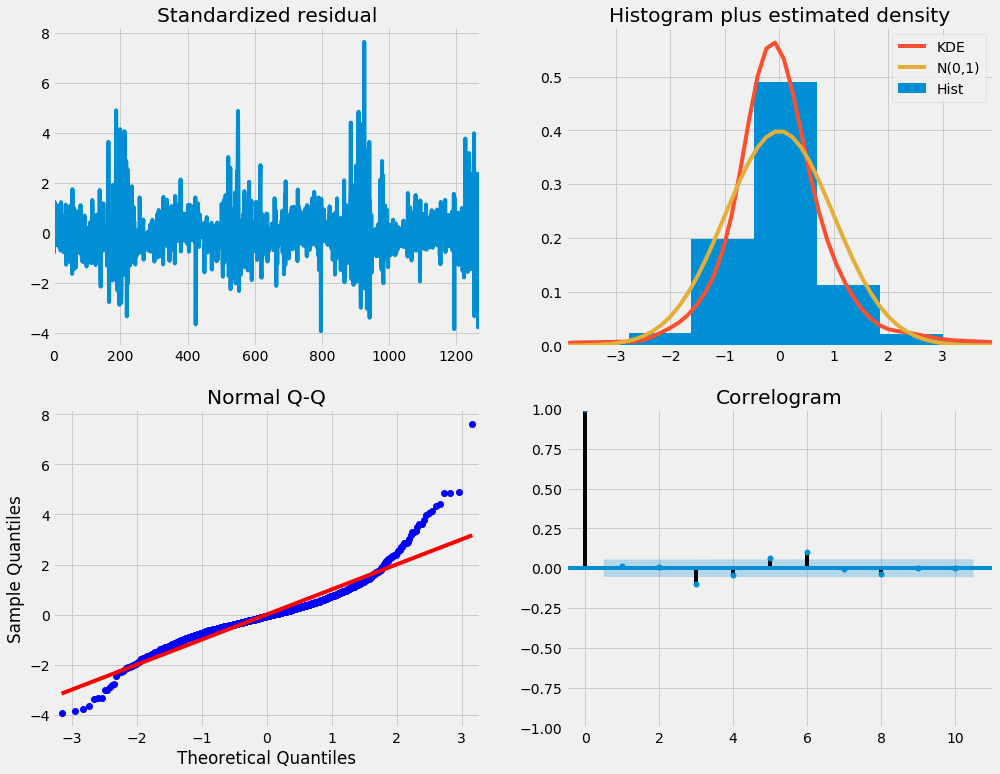

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
future_forecast = results.predict(start = 30728, end = 37544, n_periods=285)
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
#pd.concat([test,future_forecast],axis=1)
print(future_forecast.head())

       Prediction
30728  308.041914
30752  320.311926
30776  264.786714
30800  320.493718
30824  272.800220


In [ ]:
future_forecast

,Prediction
30731,222.897305
30755,222.862633
30779,222.827967
30803,222.793306
30827,222.758651
...,...
37451,213.396880
37475,213.363686
37499,213.330497
37523,213.297314


(30650, 31000)

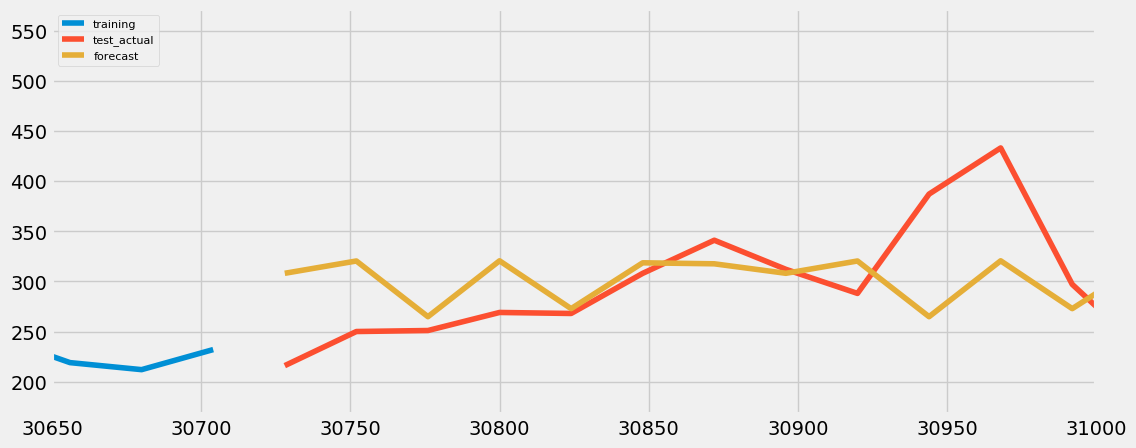

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.y_true, label='training')
plt.plot(test.y_true, label='test_actual')
plt.plot(future_forecast.Prediction, label='forecast')
plt.legend(loc='upper left', fontsize=8)
plt.xlim(30650,31000)
#plt.ylim(230,400)

In [ ]:
from statsmodels.tsa.stattools import acf
from sklearn.metrics import r2_score

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    r_sqr = r2_score(actual, forecast) 
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax, 'R-sqr':r_sqr})

forecast_accuracy(future_forecast.Prediction[:8], test.y_true[:8])

{'R-sqr': -0.4678930736487217,
 'acf1': 0.3709704121325797,
 'corr': 0.30562041598612033,
 'mae': 33.79916354267914,
 'mape': 0.1359158645927567,
 'me': 26.934604998672953,
 'minmax': 0.10790140003442283,
 'mpe': 0.11551547371085061,
 'rmse': 46.041265720586836}

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train.y_true,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 252),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

NameError: ignored

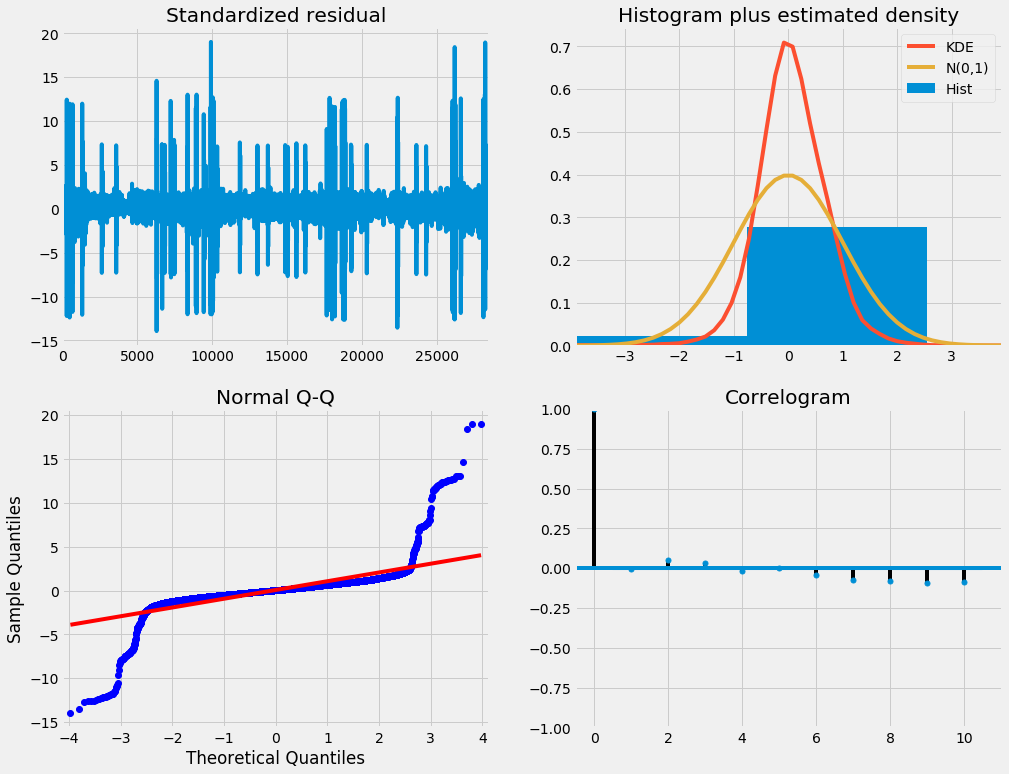

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
!pip install chart-studio

In [ ]:
future_forecast = results.predict(start = 28511, end= 37564, n_periods=9054)
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1)
print(future_forecast.head())

       Prediction
28511  332.761928
28512  316.231635
28513  303.105247
28514  294.481669
28515  287.553748


(28400, 28600)

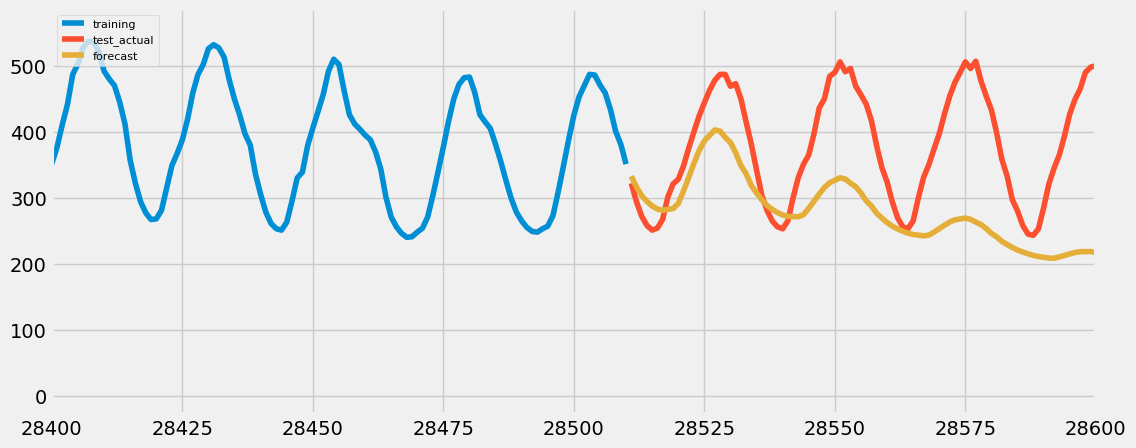

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.y_true, label='training')
plt.plot(test.y_true, label='test_actual')
plt.plot(future_forecast, label='forecast')
plt.legend(loc='upper left', fontsize=8)
plt.xlim(28400,28600)

In [ ]:
# Forecast
fc, se, conf = results.forecast(24, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.y_true, label='training')
plt.plot(test.y_true, label='test_actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
#plt.xlim(28250, 28750) 
#plt.show()

ValueError: ignored